In [28]:
import pandas as pd
import numpy as np
import ppscore as pps

df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

In [29]:
df

,x,error,y
0,-0.998070,-0.394586,0.601557
1,-1.174779,0.294141,1.674246
2,-1.632787,-0.243815,2.422180
3,1.912204,0.249697,3.906220
4,0.575129,0.313015,0.643788
...,...,...,...
999995,0.553087,-0.015339,0.290566
999996,-1.357960,0.403284,2.247339
999997,1.774206,0.175283,3.323091
999998,0.793333,-0.212108,0.417269


In [38]:
pps.score(df, "x", "y"), pps.score(df, "y", "x")

({'x': 'x',
  'y': 'y',
  'ppscore': 0.6749454587254804,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 1.027979192014105,
  'model_score': 0.3341493046998963,
  'model': DecisionTreeRegressor()},
 {'x': 'y',
  'y': 'x',
  'ppscore': 0,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 1.0146496031139451,
  'model_score': 1.065655300863199,
  'model': DecisionTreeRegressor()})

In [22]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.743692,regression,True,mean absolute error,1.284182,0.329146,DecisionTreeRegressor()
1,error,y,0.550624,regression,True,mean absolute error,1.284182,0.577081,DecisionTreeRegressor()


In [23]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.677463,regression,True,mean absolute error,1.020379,0.329110,DecisionTreeRegressor()
2,x,y,0.743692,regression,True,mean absolute error,1.284182,0.329146,DecisionTreeRegressor()
3,error,x,0.681872,regression,True,mean absolute error,1.000860,0.318402,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.550624,regression,True,mean absolute error,1.284182,0.577081,DecisionTreeRegressor()
6,y,x,0.327626,regression,True,mean absolute error,1.000860,0.672953,DecisionTreeRegressor()
7,y,error,0.283417,regression,True,mean absolute error,1.020379,0.731186,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<AxesSubplot:xlabel='x', ylabel='ppscore'>

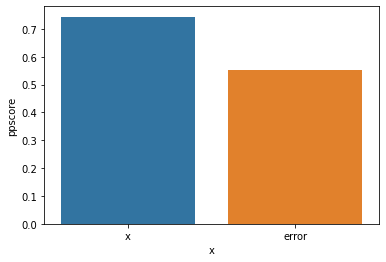

In [24]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

<AxesSubplot:xlabel='x', ylabel='y'>

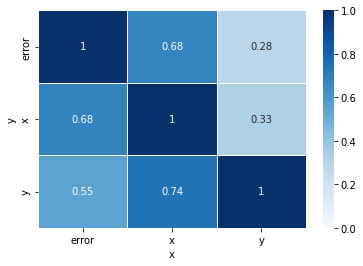

In [25]:
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [60]:
import pickle
from numpy import linalg as LA
import numpy as np

In [88]:
df = pickle.load(open(f'../data/mimic3/new_extended_data_unique_embed_CliBERT_2m.pickle', 'rb'))
x = df['inputs']
x1 = df['embeds']
x2 = df['embeds_events']
X = np.hstack([x1, x2])
y = LA.norm(X, axis=-1)

import einops
x = einops.rearrange(x, 'x y z -> (x y) z')[:,:390-300]

df_ = pd.DataFrame(x)
# df_["y"] = y
# df_['x'] = x
# df_["x1"] = LA.norm(x1, axis=-1)
# df_["x2"] = LA.norm(x2, axis=-1)

<AxesSubplot:xlabel='x', ylabel='y'>

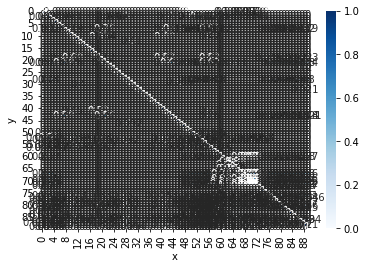

In [89]:
matrix_df = pps.matrix(df_)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

<AxesSubplot:xlabel='x', ylabel='y'>

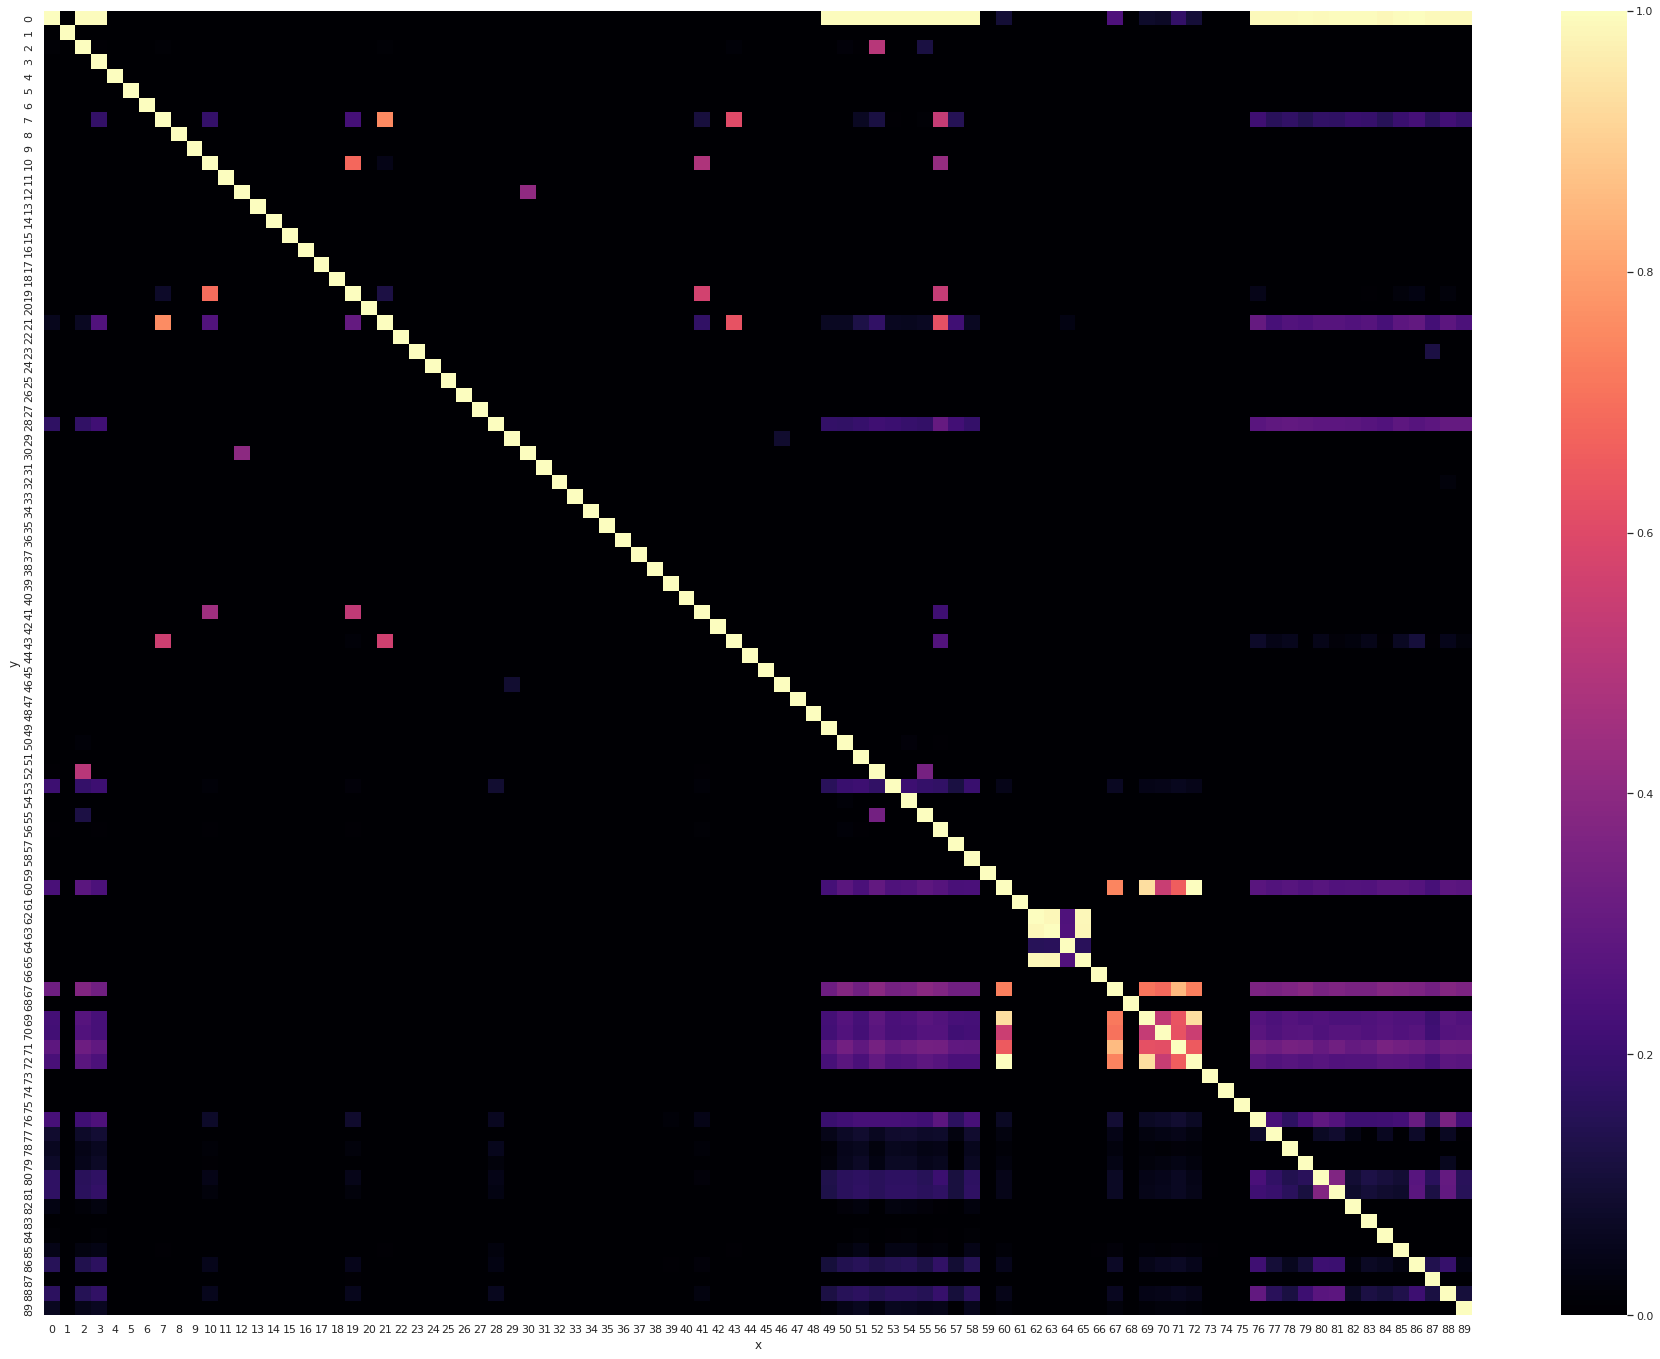

In [99]:
sns.set(rc={'figure.figsize':(32,24)})
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="magma", linewidths=0, annot=False)